## test 
https://gseapy.readthedocs.io/en/master/gseapy_example.html#4.-GSEA-Example
### Single Sample GSEA example

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [2]:
gp.__version__

'0.9.9'

In [3]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("/Users/frank/github/GSEApy/tests/data/P53.cls")
#class_vector used to indicate group attributes for each sample
print(class_vector)
print(len(class_vector))

['MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT']
50


In [4]:
gene_exp = pd.read_table("/Users/frank/github/GSEApy/tests/data/P53.txt")
gene_exp.head()

NAME DESCRIPTION   786-0  BT-549  CCRF-CEM  COLO 205    EKVX  \
0      TACC2          na   46.05   82.17     16.87     98.60  141.02   
1  C14orf132          na  108.34   59.04     25.61     33.11   42.53   
2       AGER          na   42.20   25.75     76.01     40.41   32.17   
3   32385_at          na    7.43   13.94      8.55     21.13   15.09   
4      RBM17          na   11.40    3.00      3.16      2.34    4.43   

   HCC-2998  HCT-15  HOP-62  ...      MCF7  MOLT-4  NCI-H460  OVCAR-4  SF-539  \
0    114.32  134.34   44.95  ...     68.14   32.21    105.89    64.99   53.52   
1      9.12    9.36  310.96  ...    159.32   10.71     13.59    53.78   57.57   
2     48.28   58.27   42.40  ...     51.50   61.48     44.44    45.68   54.17   
3     19.05   16.47    7.60  ...     30.77   21.27     13.36    16.19   12.07   
4      1.56    6.04    6.16  ...      1.62    2.77      4.42     8.91   12.28   

   SK-MEL-5     SR  UACC-257  UACC-62  UO-31  
0     85.47  18.69     32.16    45.70  48.13  
1     86.80  17.30    102.66    62.16  73.44  
2     62.53  83.18     56.57    50.40  36.75  
3     17.62  22.60      4.50    14.59  11.33  
4      3.04  10.13      8.32     8.23   3.91  

[5 rows x 52 columns]

In [5]:
print("positively correlated: ", phenoA)

positively correlated:  MUT


In [6]:
print("negtively correlated: ", phenoB)


negtively correlated:  WT


In [14]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name

gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='KEGG_2016', # enrichr library names
                 cls= class_vector, # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4,
                 format='png')

In [8]:
#access the dataframe results throught res2d attribute
gs_res.res2d.head()

es       nes  \
Term                                                                     
Regulation of autophagy_Homo sapiens_hsa04140      -0.478912 -1.444956   
Ovarian steroidogenesis_Homo sapiens_hsa04913      -0.415890 -1.452637   
Hepatitis B_Homo sapiens_hsa05161                  -0.323095 -1.458435   
Cell adhesion molecules (CAMs)_Homo sapiens_hsa... -0.396502 -1.424444   
Autoimmune thyroid disease_Homo sapiens_hsa05320   -0.529900 -1.426790   

                                                        pval       fdr  \
Term                                                                     
Regulation of autophagy_Homo sapiens_hsa04140       0.058824  0.484676   
Ovarian steroidogenesis_Homo sapiens_hsa04913       0.064516  0.484730   
Hepatitis B_Homo sapiens_hsa05161                   0.000000  0.494971   
Cell adhesion molecules (CAMs)_Homo sapiens_hsa...  0.071429  0.499424   
Autoimmune thyroid disease_Homo sapiens_hsa05320    0.060000  0.513591   

                                                    geneset_size  \
Term                                                               
Regulation of autophagy_Homo sapiens_hsa04140                 39   
Ovarian steroidogenesis_Homo sapiens_hsa04913                 50   
Hepatitis B_Homo sapiens_hsa05161                            146   
Cell adhesion molecules (CAMs)_Homo sapiens_hsa...           142   
Autoimmune thyroid disease_Homo sapiens_hsa05320              53   

                                                    matched_size  \
Term                                                               
Regulation of autophagy_Homo sapiens_hsa04140                 22   
Ovarian steroidogenesis_Homo sapiens_hsa04913                 39   
Hepatitis B_Homo sapiens_hsa05161                            125   
Cell adhesion molecules (CAMs)_Homo sapiens_hsa...            96   
Autoimmune thyroid disease_Homo sapiens_hsa05320              39   

                                                                                                genes  \
Term                                                                                                    
Regulation of autophagy_Homo sapiens_hsa04140       PRKAA1;IFNA2;GABARAPL2;IFNA10;IFNA16;GABARAP;U...   
Ovarian steroidogenesis_Homo sapiens_hsa04913       HSD17B2;CYP1B1;STAR;IGF1;LHCGR;CGA;PRKACB;CYP1...   
Hepatitis B_Homo sapiens_hsa05161                   MAP2K1;PIK3CA;EP300;CREB3L1;NRAS;RELA;CREB3;DD...   
Cell adhesion molecules (CAMs)_Homo sapiens_hsa...  CD58;ITGA6;PTPRF;PVRL2;CLDN10;CLDN3;NCAM2;CLDN...   
Autoimmune thyroid disease_Homo sapiens_hsa05320    HLA-DOB;CGA;CD86;TSHB;IFNA2;TSHR;HLA-DRB4;HLA-...   

                                                                                          ledge_genes  
Term                                                                                                   
Regulation of autophagy_Homo sapiens_hsa04140       PIK3C3;PRKAA2;IFNA5;BECN1;IFNG;INS;IFNA14;PIK3...  
Ovarian steroidogenesis_Homo sapiens_hsa04913       ADCY9;ADCY7;PTGS2;AKR1C3;INS;CYP11A1;CYP17A1;P...  
Hepatitis B_Homo sapiens_hsa05161                   CCNA1;CASP8;PIK3CG;CDK6;PTK2B;IFIH1;IFNB1;IFNA...  
Cell adhesion molecules (CAMs)_Homo sapiens_hsa...  CDH15;MPZ;HLA-DRB3;MPZL1;VCAM1;SELL;HLA-DRA;SD...  
Autoimmune thyroid disease_Homo sapiens_hsa05320    HLA-DRA;HLA-DMA;IFNA5;HLA-DPA1;IL2;HLA-DQB1;HL...

### show the results 
The **gsea** module will generate heatmap for genes in each gene sets in the backgroud.
But if you need to do it yourself, use the code below

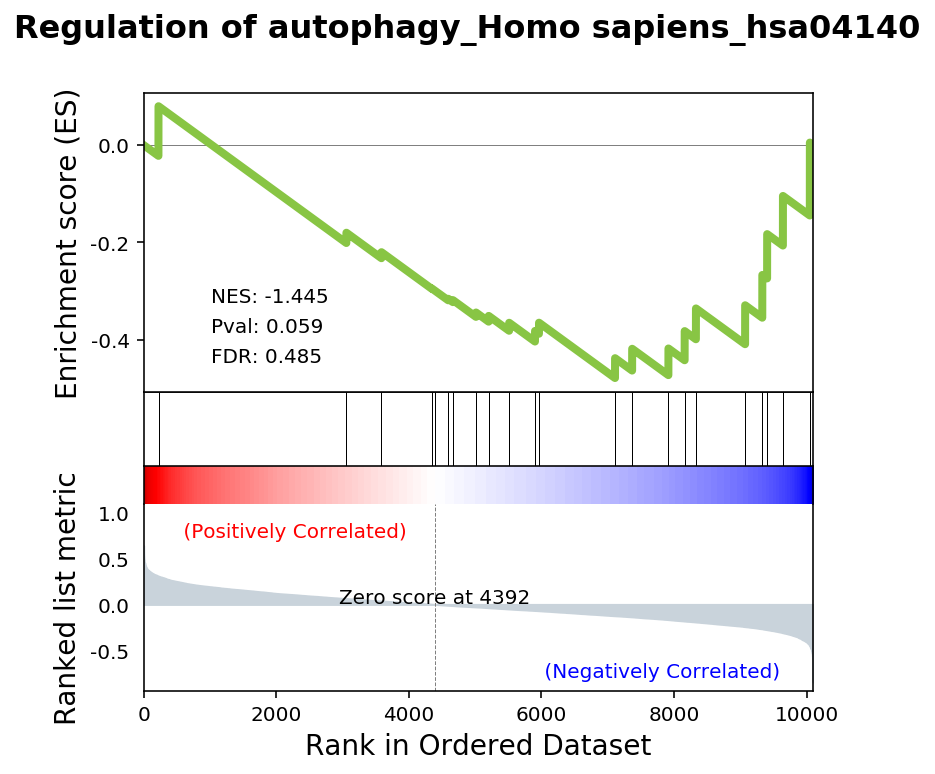

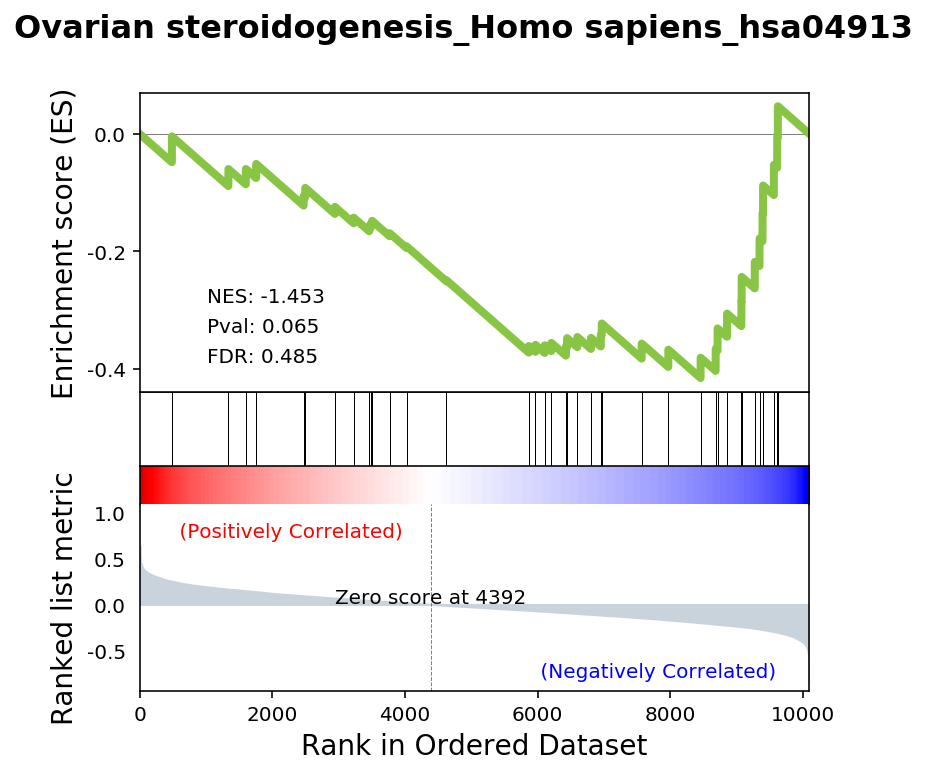

In [9]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
gseaplot(gs_res.ranking, term=terms[0], **gs_res.results[terms[0]])
gseaplot(gs_res.ranking, term=terms[1], **gs_res.results[terms[1]])